In [2]:
import pandas as pd
import numpy as np

In [4]:
lst = ['Geeks','For','Geeks','is','portal','for','Geeks']
df = pd.DataFrame(lst)
df

,0
0,Geeks
1,For
2,Geeks
3,is
4,portal
5,for
6,Geeks


In [5]:
data = {'Name':['ram','shyam','princi','sita'],
        'Age':[20,21,19,18]
}
df = pd.DataFrame(data)
df

,Name,Age
0,ram,20
1,shyam,21
2,princi,19
3,sita,18


In [7]:
data = {'Name':['ram','shyam','princi','sita'],
        'Age':[20,21,19,18],
        'Address':['Delhi','Kanpur','Allabad','Janakpur'],
        'Qualification':['MEng','Msc','MCom','Phd']
}
df = pd.DataFrame(data)
print(df)
print(df[['Name','Address']])

     Name  Age   Address Qualification
0     ram   20     Delhi          MEng
1   shyam   21    Kanpur           Msc
2  princi   19   Allabad          MCom
3    sita   18  Janakpur           Phd
     Name   Address
0     ram     Delhi
1   shyam    Kanpur
2  princi   Allabad
3    sita  Janakpur


In [21]:
df = pd.DataFrame(data,index=data['Age'])
df

,Name,Age,Address,Qualification
20,ram,20,Delhi,MEng
21,shyam,21,Kanpur,Msc
19,princi,19,Allabad,MCom
18,sita,18,Janakpur,Phd


In [27]:
print(df.loc[20])
print()
print(df.iloc[3])

Name               ram
Age                 20
Address          Delhi
Qualification     MEng
Name: 20, dtype: object

Name                 sita
Age                    18
Address          Janakpur
Qualification         Phd
Name: 18, dtype: object


In [38]:
dict1 = {'First':[100,90,np.nan,95],
'Second':[45,np.nan,30,20],
'Third':[10,20,30,40]}
df=pd.DataFrame(dict1)
df.isnull()

,First,Second,Third
0,False,False,False
1,False,True,False
2,True,False,False
3,False,False,False


In [32]:
df.fillna(0)

,First,Second,Third
0,100.0,45.0,10
1,90.0,0.0,20
2,0.0,30.0,30
3,95.0,20.0,40


In [36]:
df.interpolate(method='cubicspline')

,First,Second,Third
0,100.000000,45.000000,10
1,90.000000,38.333333,20
2,88.333333,30.000000,30
3,95.000000,20.000000,40


In [41]:
df.replace(np.nan,0)

,First,Second,Third
0,100.0,45.0,10
1,90.0,0.0,20
2,0.0,30.0,30
3,95.0,20.0,40


In [42]:
for i,j in df.iterrows():
    print(i)
    print()
    print(j)

0

First     100.0
Second     45.0
Third      10.0
Name: 0, dtype: float64
1

First     90.0
Second     NaN
Third     20.0
Name: 1, dtype: float64
2

First      NaN
Second    30.0
Third     30.0
Name: 2, dtype: float64
3

First     95.0
Second    20.0
Third     40.0
Name: 3, dtype: float64


In [57]:
columns = list(df)
for i in columns:
    print(df[i][0])
print(columns)

100.0
45.0
10
['First', 'Second', 'Third']


DATA CLEANING

In [61]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [15]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

In [17]:
cat_col
num_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [40]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [62]:
df = df.drop(columns=['Name','PassengerId','Ticket'])

In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [63]:
round((df.isnull().sum()/df.shape[0])*100,2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

In [64]:
df = df.drop(columns=['Cabin'])

In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [65]:
df = df.dropna(subset=['Embarked'],axis=0)

In [47]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [66]:
df.shape

(889, 8)

In [67]:
df = df.fillna(df.Age.mean())

In [51]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [68]:
import matplotlib.pyplot as plt

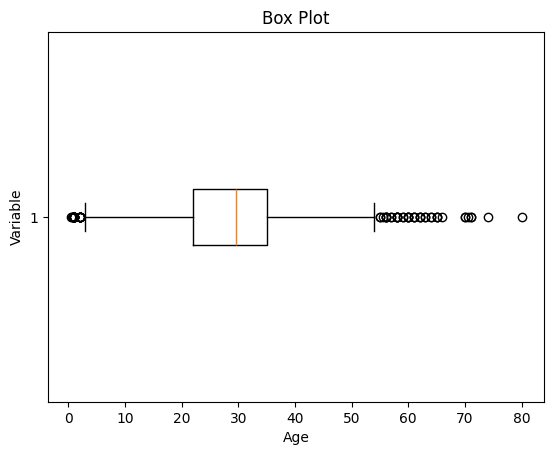

In [71]:
plt.boxplot(df['Age'],vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [72]:
mean = df['Age'].mean()
std = df['Age'].std()
lower_bound = mean-std*2
upper_bound = mean+std*2
print(lower_bound,upper_bound)

3.7054001079256587 55.57878528533277


In [77]:
df = df[(df['Age']>= lower_bound) & (df['Age']<=upper_bound)]

In [78]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.642093,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [81]:
X = df[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df['Survived']

In [83]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))

num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X

x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15464\4184666528.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.349515,0.125,0.0,0.014151,S
1,0.0,female,0.660194,0.125,0.0,0.139136,C
2,1.0,female,0.427184,0.000,0.0,0.015469,S
3,0.0,female,0.601942,0.125,0.0,0.103644,S
4,1.0,male,0.601942,0.000,0.0,0.015713,S


Working with missing data

In [84]:
dict = {'First Score':[100, 90, np.nan, 95],
        'Second Score': [30, 45, 56, np.nan],
        'Third Score':[np.nan, 40, 80, 98]}

df = pd.DataFrame(dict)

In [85]:
df

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [86]:
df.isnull()

,First Score,Second Score,Third Score
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [87]:
df.notnull()

,First Score,Second Score,Third Score
0,True,True,False
1,True,True,True
2,False,True,True
3,True,False,True


In [92]:
import pandas as pd 
  
data = pd.read_csv("employees.csv") 
  
bool_series = pd.isnull(data['Gender']) 
  
data[bool_series] 

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
20,Lois,NaN,4/22/1995,7:18 PM,64714,4.934,True,Legal
22,Joshua,NaN,3/8/2012,1:58 AM,90816,18.816,True,Client Services
27,Scott,NaN,7/11/1991,6:58 PM,122367,5.218,False,Legal
31,Joyce,NaN,2/20/2005,2:40 PM,88657,12.752,False,Product
41,Christine,NaN,6/28/2015,1:08 AM,66582,11.308,True,Business Development
...,...,...,...,...,...,...,...,...
961,Antonio,NaN,6/18/1989,9:37 PM,103050,3.050,False,Legal
972,Victor,NaN,7/28/2006,2:49 PM,76381,11.159,True,Sales
985,Stephen,NaN,7/10/1983,8:10 PM,85668,1.909,False,Legal
989,Justin,NaN,2/10/1991,4:58 PM,38344,3.794,False,Legal


In [89]:
bool_series = pd.notnull(data['Gender']) 
  
data[bool_series] 

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
994,George,Male,6/21/2013,5:47 PM,98874,4.479,True,Marketing
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [93]:
data.fillna(0)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,0
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,0,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [94]:
dict = {'First Score':[100, 90, np.nan, 95],
        'Second Score': [30, 45, 56, np.nan],
        'Third Score':[np.nan, 40, 80, 98]}


df = pd.DataFrame(dict)


df.fillna(0)

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


In [95]:
df.fillna(method ='pad') #fill null values with previous ones

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15464\3046802722.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method ='pad')


,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,90.0,56.0,80.0
3,95.0,56.0,98.0


In [96]:
df.fillna(method ='bfill') #fill null values with next values

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15464\2854344066.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method ='bfill') #fill null values with next values


,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,95.0,56.0,80.0
3,95.0,NaN,98.0


In [98]:
df = pd.read_csv('employees.csv')
df[10:25]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
10,Louise,Female,8/12/1980,9:01 AM,63241,15.132,True,NaN
11,Julie,Female,10/26/1997,3:19 PM,102508,12.637,True,Legal
12,Brandon,Male,12/1/1980,1:08 AM,112807,17.492,True,Human Resources
13,Gary,Male,1/27/2008,11:40 PM,109831,5.831,False,Sales
14,Kimberly,Female,1/14/1999,7:13 AM,41426,14.543,True,Finance
15,Lillian,Female,6/5/2016,6:09 AM,59414,1.256,False,Product
16,Jeremy,Male,9/21/2010,5:56 AM,90370,7.369,False,Human Resources
17,Shawn,Male,12/7/1986,7:45 PM,111737,6.414,False,Product
18,Diana,Female,10/23/1981,10:27 AM,132940,19.082,False,Client Services
19,Donna,Female,7/22/2010,3:48 AM,81014,1.894,False,Product


In [102]:
data['Gender'].fillna('No Gender',inplace=True)

In [103]:
data[10:25]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
10,Louise,Female,8/12/1980,9:01 AM,63241,15.132,True,NaN
11,Julie,Female,10/26/1997,3:19 PM,102508,12.637,True,Legal
12,Brandon,Male,12/1/1980,1:08 AM,112807,17.492,True,Human Resources
13,Gary,Male,1/27/2008,11:40 PM,109831,5.831,False,Sales
14,Kimberly,Female,1/14/1999,7:13 AM,41426,14.543,True,Finance
15,Lillian,Female,6/5/2016,6:09 AM,59414,1.256,False,Product
16,Jeremy,Male,9/21/2010,5:56 AM,90370,7.369,False,Human Resources
17,Shawn,Male,12/7/1986,7:45 PM,111737,6.414,False,Product
18,Diana,Female,10/23/1981,10:27 AM,132940,19.082,False,Client Services
19,Donna,Female,7/22/2010,3:48 AM,81014,1.894,False,Product


In [105]:
#using replace method to fill null values
data['Gender'].replace(to_replace='No Gender',value = 'No Idea',inplace=True)

In [106]:
data[10:25]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
10,Louise,Female,8/12/1980,9:01 AM,63241,15.132,True,NaN
11,Julie,Female,10/26/1997,3:19 PM,102508,12.637,True,Legal
12,Brandon,Male,12/1/1980,1:08 AM,112807,17.492,True,Human Resources
13,Gary,Male,1/27/2008,11:40 PM,109831,5.831,False,Sales
14,Kimberly,Female,1/14/1999,7:13 AM,41426,14.543,True,Finance
15,Lillian,Female,6/5/2016,6:09 AM,59414,1.256,False,Product
16,Jeremy,Male,9/21/2010,5:56 AM,90370,7.369,False,Human Resources
17,Shawn,Male,12/7/1986,7:45 PM,111737,6.414,False,Product
18,Diana,Female,10/23/1981,10:27 AM,132940,19.082,False,Client Services
19,Donna,Female,7/22/2010,3:48 AM,81014,1.894,False,Product


In [107]:
#lets use the interpolate function to fill in the values

df = pd.DataFrame({'A':[12, 4, 5, None, 1], 
                   'B':[None, 2, 54, 3, None], 
                   'C':[20, 16, None, 3, 8], 
                   'D':[14, 3, None, None, 6]}) 

In [108]:
df

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,NaN,NaN
3,NaN,3.0,3.0,NaN
4,1.0,NaN,8.0,6.0


In [111]:
df.interpolate(method='linear',limit_direction='backward')

,A,B,C,D
0,12.0,2.0,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,9.5,4.0
3,3.0,3.0,3.0,5.0
4,1.0,NaN,8.0,6.0


In [112]:
#dropping values
dict = {'First Score':[100, 90, np.nan, 95],
        'Second Score': [30, np.nan, 45, 56],
        'Third Score':[52, 40, 80, 98],
        'Fourth Score':[np.nan, np.nan, np.nan, 65]}

df = pd.DataFrame(dict)

In [113]:
df.dropna()

,First Score,Second Score,Third Score,Fourth Score
3,95.0,56.0,98,65.0


In [114]:
#lets see some variations of dropna
dict = {'First Score':[100, np.nan, np.nan, 95],
        'Second Score': [30, np.nan, 45, 56],
        'Third Score':[52, np.nan, 80, 98],
        'Fourth Score':[np.nan, np.nan, np.nan, 65]}
df = pd.DataFrame(dict)

In [115]:
df.dropna(how='all') #drops row if all values in that row is null

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52.0,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,65.0


In [127]:
dict = {'First Score':[100, np.nan, np.nan, 95],
        'Second Score': [30, np.nan, 45, 56],
        'Third Score':[52,22, 80, 98],
        'Fourth Score':[60, 67, 68, 65]}
df = pd.DataFrame(dict)

In [118]:
df.dropna(axis=1) #drops columns if atleast one value in the row is null

,Fourth Score
0,60
1,67
2,68
3,65


In [128]:
df.dropna(
) #drops rows if atleast one value in the row is null

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52,60
3,95.0,56.0,98,65


In [134]:
data = pd.read_csv('employees.csv')
new_data = data.dropna(axis = 0, how ='any') 
  
new_data

(1000, 8)

In [135]:
data.shape
new_data.shape

(764, 8)